In [1]:
#形状，極座標変換
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

folder_lists = [
    "/home/data/keijo_test/mask"
]

for folder_path in folder_lists:
    folder_name = folder_path.split("/")[-1]
    img_files = glob.glob(os.path.join(folder_path, '*.jpg'))
    
    for img in img_files:
        # 画像を読み込む
        mask = cv2.imread(img)

        # グレースケール画像を作成
        gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # 二値化
        ret2, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # 輪郭を検出
        contours, hierarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        max_contour = max(contours, key=cv2.contourArea)

        # 最小外接円を用いて中心座標を取得
        (x, y), radius = cv2.minEnclosingCircle(max_contour)

        # 重心を計算する
        M = cv2.moments(max_contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0
        center = (cX, cY)
        radius = int(radius)

        # 極座標変換
        h, w = mask.shape[:2]
        flags = cv2.INTER_CUBIC + cv2.WARP_FILL_OUTLIERS + cv2.WARP_POLAR_LINEAR
        linear_polar = cv2.warpPolar(mask, (w, h), center, radius, flags)

        # 逆極座標変換
        flags = cv2.INTER_CUBIC + cv2.WARP_FILL_OUTLIERS + cv2.WARP_POLAR_LINEAR + cv2.WARP_INVERSE_MAP
        # linear_polar_inverse = cv2.warpPolar(linear_polar, (w, h), center, radius, flags)
        filename = os.path.splitext(os.path.basename(img))[0]
        cv2.imwrite(f'/home/data/keijo_test/keijo/{filename}.jpg', linear_polar)
# cv2.imwrite('/home/data/test/linear_polar_inverse.png', linear_polar_inverse)


# 画像の表示
# plt.figure(figsize=(15, 10))

# plt.subplot(1, 2, 1)
# plt.title('Original Image')
# plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.title('Linear Polar')
# plt.imshow(cv2.cvtColor(linear_polar, cv2.COLOR_BGR2RGB))
# plt.axis('off')

# plt.show()

In [2]:
#形状，極座標変換，可視化
import cv2
import numpy as np
import glob
import os

folder_lists = [
    "/home/data/keijo_test/keijo"
]

pixel_ratios = {}

for folder_path in folder_lists:
    folder_name = folder_path.split("/")[-1]
    img_files = glob.glob(os.path.join(folder_path, '*.jpg'))
    
    for img in img_files:
        # 画像を読み込む
        mask = cv2.imread(img)

        # グレースケール画像を作成
        gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # 二値化
        ret2, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # 白と黒のピクセル数を数える
        white_pixel_count = np.sum(th == 255)
        black_pixel_count = np.sum(th == 0)
        total_pixel_count = white_pixel_count + black_pixel_count

        # 割合を計算
        white_ratio = white_pixel_count / total_pixel_count
        black_ratio = black_pixel_count / total_pixel_count

        # ファイル名を取得
        filename = os.path.splitext(os.path.basename(img))[0]

        # 辞書に保存
        pixel_ratios[filename] = {
            'white_ratio': white_ratio,
            'black_ratio': black_ratio
        }

# 結果を表示
for filename, ratios in pixel_ratios.items():
    print(f"File: {filename}, White Ratio: {ratios['white_ratio']:.2f}, Black Ratio: {ratios['black_ratio']:.2f}")

File: IMG_1625, White Ratio: 0.91, Black Ratio: 0.09
File: IMG_1618, White Ratio: 0.94, Black Ratio: 0.06
File: IMG_1620, White Ratio: 0.91, Black Ratio: 0.09
File: IMG_1616, White Ratio: 0.93, Black Ratio: 0.07
File: IMG_1624, White Ratio: 0.92, Black Ratio: 0.08
File: IMG_1622, White Ratio: 0.90, Black Ratio: 0.10
File: IMG_1617, White Ratio: 0.93, Black Ratio: 0.07
File: IMG_1627, White Ratio: 0.94, Black Ratio: 0.06
File: IMG_1621, White Ratio: 0.93, Black Ratio: 0.07
File: IMG_1623, White Ratio: 0.90, Black Ratio: 0.10
File: IMG_1626, White Ratio: 0.84, Black Ratio: 0.16
File: IMG_1619, White Ratio: 0.95, Black Ratio: 0.05
File: IMG_0001, White Ratio: 1.00, Black Ratio: 0.00


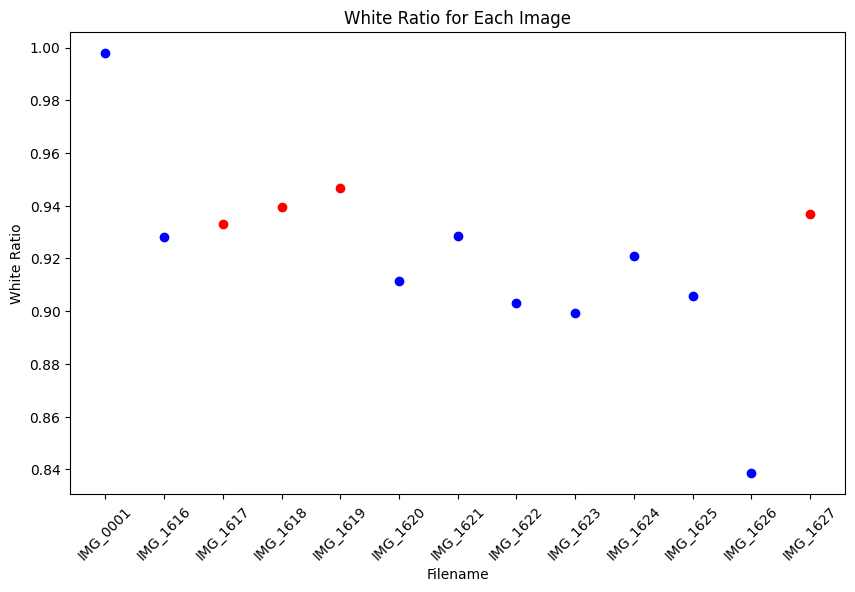

In [3]:
# グラフをプロットするために必要なライブラリをインポート
import matplotlib.pyplot as plt
import re

# ファイル名とwhite_ratioのリストを作成
filenames = list(pixel_ratios.keys())
white_ratios = [ratios['white_ratio'] for ratios in pixel_ratios.values()]

# ファイル名のIMG_以降の数字でソート
sorted_data = sorted(
    [(filenames[i], white_ratios[i]) for i in range(len(filenames)) if re.search(r'IMG_(\d+)', filenames[i])],
    key=lambda x: int(re.search(r'IMG_(\d+)', x[0]).group(1))
)
sorted_filenames = [data[0] for data in sorted_data]
sorted_white_ratios = [data[1] for data in sorted_data]

# 特定のファイル名を指定
highlight_files = ['IMG_1617', 'IMG_1618','IMG_1619','IMG_1627']

# グラフをプロット
plt.figure(figsize=(10, 6))
for filename, white_ratio in zip(sorted_filenames, sorted_white_ratios):
    color = 'red' if filename in highlight_files else 'blue'
    plt.scatter(filename, white_ratio, color=color)
plt.xlabel('Filename')
plt.ylabel('White Ratio')
plt.title('White Ratio for Each Image')
plt.xticks(rotation=45)
plt.show()

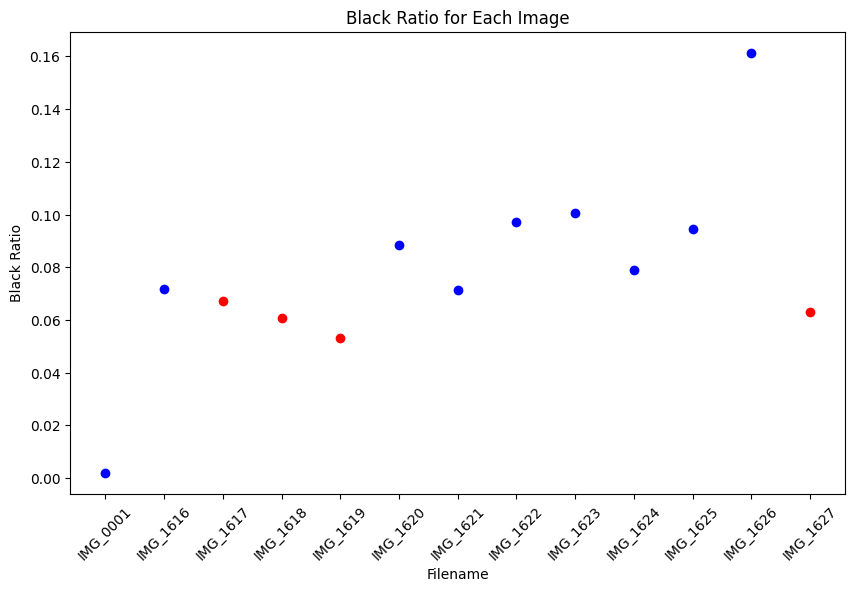

In [4]:
#シイタケ以外の領域
import matplotlib.pyplot as plt
import re

# ファイル名とwhite_ratioのリストを作成
filenames = list(pixel_ratios.keys())
white_ratios = [ratios['black_ratio'] for ratios in pixel_ratios.values()]

# ファイル名のIMG_以降の数字でソート
sorted_data = sorted(
    [(filenames[i], white_ratios[i]) for i in range(len(filenames)) if re.search(r'IMG_(\d+)', filenames[i])],
    key=lambda x: int(re.search(r'IMG_(\d+)', x[0]).group(1))
)
sorted_filenames = [data[0] for data in sorted_data]
sorted_white_ratios = [data[1] for data in sorted_data]

# 特定のファイル名を指定
highlight_files = ['IMG_1617', 'IMG_1618','IMG_1619','IMG_1627']

# グラフをプロット
plt.figure(figsize=(10, 6))
for filename, white_ratio in zip(sorted_filenames, sorted_white_ratios):
    color = 'red' if filename in highlight_files else 'blue'
    plt.scatter(filename, white_ratio, color=color)
plt.xlabel('Filename')
plt.ylabel('Black Ratio')
plt.title('Black Ratio for Each Image')
plt.xticks(rotation=45)
plt.show()

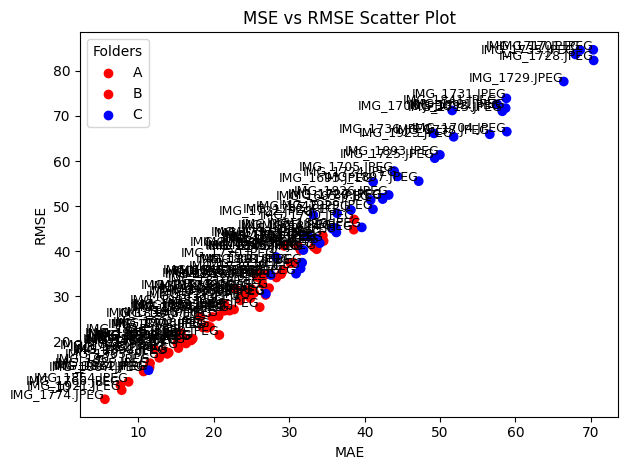

In [5]:
from sklearn.metrics import r2_score
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error

# データフォルダのパスリスト
folders = [
    "/home/data/0107_jikunashi_change/maskBB/A",
    "/home/data/0107_jikunashi_change/maskBB/B",
    "/home/data/0107_jikunashi_change/maskBB/C"
]

# 1次元データを保存する辞書と評価結果を格納する辞書
one_dimensional_data_dict = {}
evaluation_results = {}
folder_colors = {"A": "red", "B": "red", "C": "blue"}

# フォルダごとに処理
for folder in folders:
    folder_name = os.path.basename(folder)
    image_paths = glob.glob(os.path.join(folder, '*.JPEG'))

    for img_path in image_paths:
        # 画像の読み込み
        mask = cv2.imread(img_path)

        # グレースケール画像に変換
        gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # 二値化
        _, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # 輪郭を検出し、最大の輪郭を取得
        contours, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if not contours:
            continue
        max_contour = max(contours, key=cv2.contourArea)

        # 最小外接円を取得
        (x, y), radius = cv2.minEnclosingCircle(max_contour)
        radius = int(radius)

        # 重心を計算
        M = cv2.moments(max_contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0
        center = (cX, cY)

        # 極座標変換
        h, w = gray.shape
        flags = cv2.INTER_CUBIC + cv2.WARP_FILL_OUTLIERS + cv2.WARP_POLAR_LINEAR
        linear_polar = cv2.warpPolar(gray, (w, h), center, radius, flags)

        # 行ごとの黒ピクセル数をカウント
        black_pixel_count = np.sum(linear_polar == 0, axis=1)
        file_name = os.path.basename(img_path)
        one_dimensional_data_dict[file_name] = black_pixel_count

        # 真円の場合の理想データ（黒ピクセル数が0）
        y_pseudo = np.zeros_like(black_pixel_count)

        # 評価指標の計算
        mae = mean_absolute_error(y_pseudo, black_pixel_count)
        mse = mean_squared_error(y_pseudo, black_pixel_count)
        r2 = r2_score(y_pseudo, black_pixel_count)

        evaluation_results[file_name] = {
            'MSE': mse, 
            'MAE': mae, 
            'R²': r2,
            'Folder': folder_name
        }

# 散布図の作成
file_names = list(evaluation_results.keys())
mae_values = [metrics['MAE'] for metrics in evaluation_results.values()]
mse_values = [metrics['MSE'] for metrics in evaluation_results.values()]
rmse_values = [np.sqrt(metrics['MSE']) for metrics in evaluation_results.values()]
r2_values = [metrics['R²'] for metrics in evaluation_results.values()]
colors = [folder_colors[metrics['Folder']] for metrics in evaluation_results.values()]

# 散布図の準備
fig, ax = plt.subplots()  # 単一プロットを作成

# MSE vs RMSEの散布図
scatter1 = ax.scatter(mae_values, rmse_values, c=colors)  # 正しい方法
for folder, color in folder_colors.items():
    ax.scatter([], [], c=color, label=folder)  # レジェンド用のダミーポイント

ax.legend(title="Folders")  # レジェンドを追加
ax.set_xlabel('MAE')        # X軸ラベル
ax.set_ylabel('RMSE')       # Y軸ラベル
ax.set_title('MSE vs RMSE Scatter Plot')  # グラフタイトル

# 各点にファイル名を表示
for i, file_name in enumerate(file_names):
    ax.annotate(file_name, (mae_values[i], rmse_values[i]), fontsize=9, ha='right')  # 正しい位置に注釈を追加

# グラフの表示
plt.tight_layout()
plt.show()


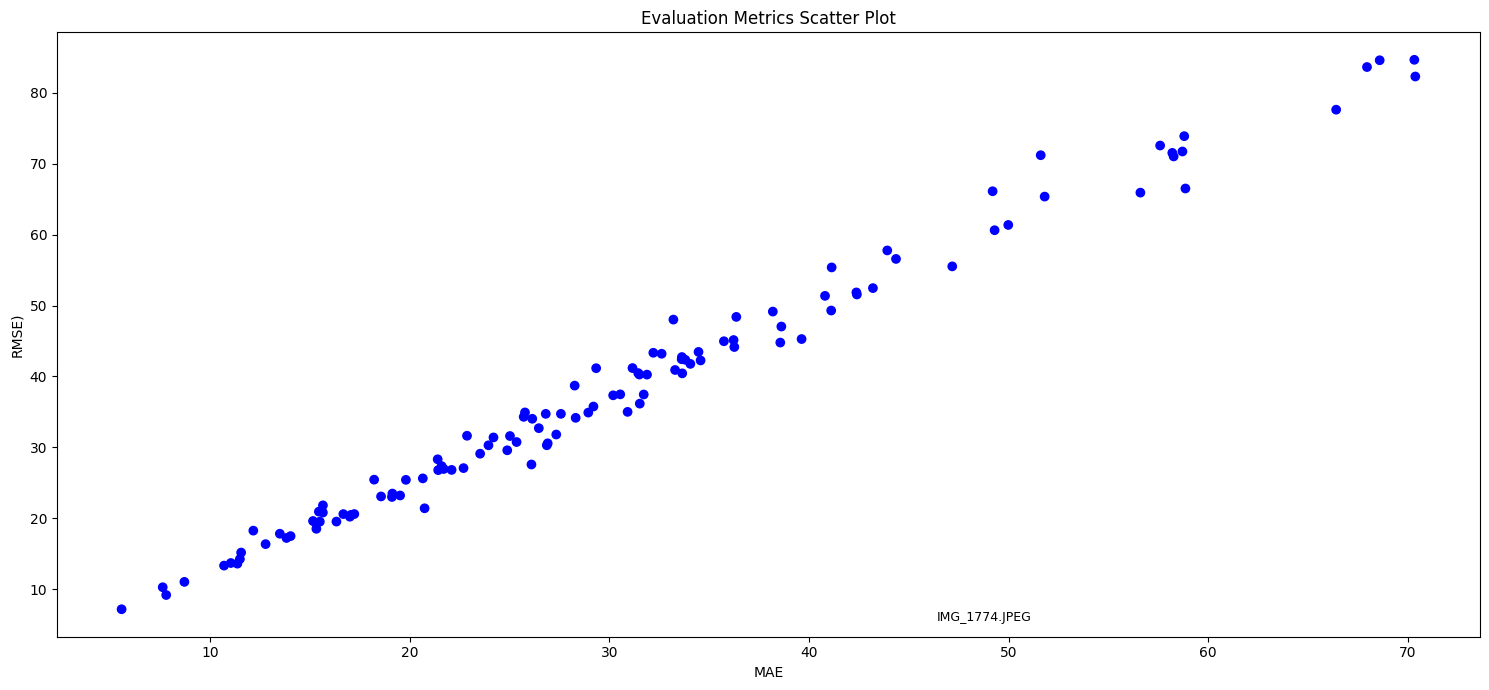

In [6]:
# 散布図の作成
file_names = list(evaluation_results.keys())
mse_values = [metrics['MSE'] for metrics in evaluation_results.values()]
mae_values = [metrics['MAE'] for metrics in evaluation_results.values()]
rmse_values = [np.sqrt(metrics['MSE']) for metrics in evaluation_results.values()]


# 色を指定するリストを作成
highlight_files = ['IMG_1617.jpg', 'IMG_1619.jpg','IMG_1627.jpg']  # 色を変えたいファイル名のリスト
colors = ['red' if file_name in highlight_files else 'blue' for file_name in file_names]

fig, ax = plt.subplots(figsize=(15, 7))
scatter = ax.scatter(mae_values, rmse_values, c=colors)

# ラベルの追加
ax.set_xlabel('MAE')
ax.set_ylabel('RMSE)')
ax.set_title('Evaluation Metrics Scatter Plot')

# 各点にファイル名を表示
for i, file_name in enumerate(file_names):
    ax.annotate(file_name, (mse_values[i], mae_values[i]), fontsize=9, ha='right')

# グラフの表示
plt.tight_layout()
plt.show()

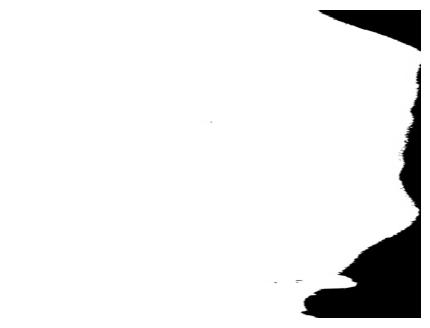

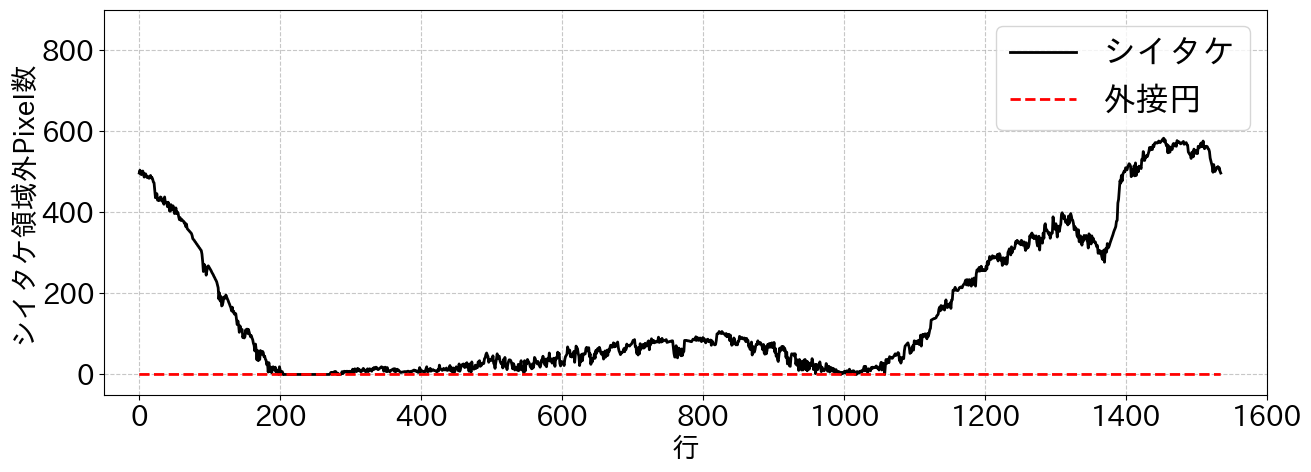

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# 画像のパス
# img = "/home/data/1216_jikunashi/cropped_mask.JPEG"
img = "/home/data/0203_energee_after/cropedmask.JPEG"

# 画像を読み込む
mask = cv2.imread(img)

# グレースケール画像を作成
gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# 二値化
ret2, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 輪郭を検出
contours, hierarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
max_contour = max(contours, key=cv2.contourArea)

# 最小外接円を用いて中心座標を取得
(x, y), radius = cv2.minEnclosingCircle(max_contour)
center = (int(x), int(y))

# 元の画像に最小外接円と重心を描画
original_image_with_circle = mask.copy()
cv2.circle(original_image_with_circle, (int(x), int(y)), int(radius), (0, 255, 0), 20)  # 最小外接円
cv2.circle(original_image_with_circle, center, 5, (0, 0, 255), -1)  # 重心

# 極座標変換
h, w = mask.shape[:2]
flags = cv2.INTER_CUBIC + cv2.WARP_FILL_OUTLIERS + cv2.WARP_POLAR_LINEAR
linear_polar = cv2.warpPolar(mask, (w, h), center, radius, flags)

# グレースケール画像で再取得（極座標画像）
linear_polar_gray = cv2.cvtColor(linear_polar, cv2.COLOR_BGR2GRAY)

# 行ごとの黒ピクセル数をカウント
black_pixel_counts = np.sum(linear_polar_gray == 0, axis=1)

# 同じ長さのゼロ配列を作成
zero_pixel_counts = np.zeros_like(black_pixel_counts)

# # 画像1: 元画像 + 最小外接円
# plt.figure(figsize=(10, 4))
# plt.imshow(cv2.cvtColor(original_image_with_circle, cv2.COLOR_BGR2RGB))
# plt.title('直行座標系', fontsize=20)
# # plt.axis('off')
# plt.tick_params(axis='both', which='major', labelsize=16)  # 目盛りラベルのサイズ
# plt.show()

# # 画像2: 極座標変換画像
plt.figure(figsize=(10, 4))
plt.imshow(cv2.cvtColor(linear_polar, cv2.COLOR_BGR2RGB))
# plt.title('極座標系', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)  # 目盛りラベルのサイズ
plt.axis('off')
plt.show()

# グラフ: 黒ピクセル数
plt.figure(figsize=(15, 5))  # グラフのサイズを大きく
plt.plot(black_pixel_counts, color="black", label="シイタケ", linewidth=2)
plt.plot(zero_pixel_counts, color="red", linestyle="--", label="外接円", linewidth=2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(-50, 1600)
plt.ylim(-50, 900)
plt.legend(loc='upper right', fontsize=24)  # 凡例を右上に配置
plt.tick_params(axis='both', which='major', labelsize=20)  # 目盛りラベルのサイズ
# plt.title('黒ピクセル数のグラフ', fontsize=12)
plt.xlabel('行', fontsize=20)
plt.ylabel('シイタケ領域外Pixel数', fontsize=20)
plt.show()





Folder A contains 48 images.
Folder B contains 30 images.
Folder C contains 21 images.


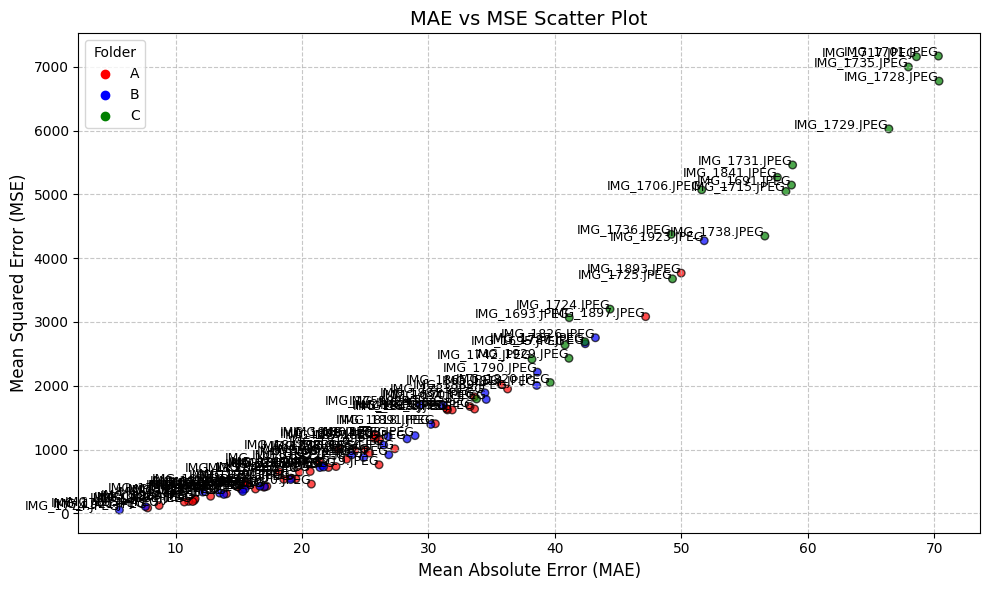

/tmp/ipykernel_1143605/2754760107.py:155: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=evaluation_df, x='Folder', y='MSE', palette="Set2")


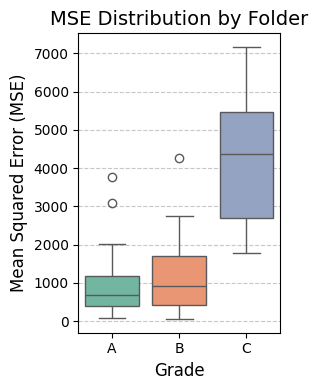

BとC間のMAE T検定結果 - t-statistic: -8.446104483131052, p-value: 4.0045103701844206e-11
BとC間には統計的に有意な差があります（p < 0.05）
AとC間のMAE T検定結果 - t-statistic: -11.361815844301, p-value: 2.8251301925135145e-17
AとC間には統計的に有意な差があります（p < 0.05）
BとC間のMSE T検定結果 - t-statistic: -8.453424138380646, p-value: 3.903677846580175e-11
BとC間には統計的に有意な差があります（p < 0.05）
AとC間のMSE T検定結果 - t-statistic: -11.55513299948248, p-value: 1.3293092216428716e-17
AとC間には統計的に有意な差があります（p < 0.05）


In [8]:
#allcracify_test
import os 
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import scipy.stats as stats
import seaborn as sns
import pandas as pd


data = "0108_keijo"

inputfolder_lists = [
    f"/home/data/{data}/maskBB/A",
    f"/home/data/{data}/maskBB/B",
    f"/home/data/{data}/maskBB/C",
]
one_dimensional_data_dict = {}
evaluation_results = {}

for folder in inputfolder_lists:
    folder_name = os.path.basename(folder)
    image_paths = glob.glob(os.path.join(folder, '*.JPEG'))
    
    # 画像ファイル数をカウント
    num_images = len(image_paths)
    print(f"Folder {folder_name} contains {num_images} images.")

    for img_path in image_paths:
        # 画像の読み込み
        mask = cv2.imread(img_path)

        # グレースケール画像に変換
        gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # 二値化
        _, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # 輪郭を検出し、最大の輪郭を取得
        contours, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if not contours:
            continue
        max_contour = max(contours, key=cv2.contourArea)

        # 最小外接円を取得
        (x, y), radius = cv2.minEnclosingCircle(max_contour)
        radius = int(radius)

        # 重心を計算
        M = cv2.moments(max_contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0
        center = (cX, cY)

        # 極座標変換
        h, w = gray.shape
        flags = cv2.INTER_CUBIC + cv2.WARP_FILL_OUTLIERS + cv2.WARP_POLAR_LINEAR
        linear_polar = cv2.warpPolar(gray, (w, h), center, radius, flags)

        # 行ごとの黒ピクセル数をカウント
        black_pixel_count = np.sum(linear_polar == 0, axis=1)
        file_name = os.path.basename(img_path)
        one_dimensional_data_dict[file_name] = black_pixel_count

        # 真円の場合の理想データ（黒ピクセル数が0）
        y_pseudo = np.zeros_like(black_pixel_count)

        # 評価指標の計算
        mae = mean_absolute_error(y_pseudo, black_pixel_count)
        mse = mean_squared_error(y_pseudo, black_pixel_count)
        rmse = np.sqrt(mse)  # RMSEを計算

        evaluation_results[file_name] = {
            'MSE': mse, 
            'MAE': mae, 
            'RMSE': rmse,  # RMSEを追加
            'Folder': folder_name
        }

# MAE、MSE、RMSEの抽出
file_names = list(evaluation_results.keys())
mae_values = [metrics['MAE'] for metrics in evaluation_results.values()]
mse_values = [metrics['MSE'] for metrics in evaluation_results.values()]
rmse_values = [metrics['RMSE'] for metrics in evaluation_results.values()]
folders = [metrics['Folder'] for metrics in evaluation_results.values()]

# フォルダーごとの色分け設定
folder_colors = {"A": "red", "B": "blue", "C": "green"}
colors = [folder_colors[folder] for folder in folders]

# MAE vs MSEの散布図
plt.figure(figsize=(10, 6))
plt.scatter(mae_values, mse_values, c=colors, alpha=0.7, edgecolors='k', s=30)

# ラベルとタイトル
plt.xlabel("Mean Absolute Error (MAE)", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.title("MAE vs MSE Scatter Plot", fontsize=14)

# 凡例の追加
for folder, color in folder_colors.items():
    plt.scatter([], [], c=color, label=folder)
plt.legend(title="Folder", fontsize=10)

# ファイル名を各点に表示（オプション）
for i, file_name in enumerate(file_names):
    plt.annotate(file_name, (mae_values[i], mse_values[i]), fontsize=9, ha='right')

# グラフの表示
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
evaluation_df = pd.DataFrame(evaluation_results).T  # Transposeして、各画像の情報を行として表示
# MAE、MSE、RMSEのフォルダーごとの箱ひげ図
folder_mae_values = {folder: [] for folder in folder_colors.keys()}
folder_mse_values = {folder: [] for folder in folder_colors.keys()}
folder_rmse_values = {folder: [] for folder in folder_colors.keys()}

for metrics in evaluation_results.values():
    folder_mae_values[metrics['Folder']].append(metrics['MAE'])
    folder_mse_values[metrics['Folder']].append(metrics['MSE'])
    folder_rmse_values[metrics['Folder']].append(metrics['RMSE'])

# MAEの箱ひげ図
# plt.figure(figsize=(12, 6))
# plt.boxplot(
#     folder_mae_values.values(),
#     labels=folder_mae_values.keys(),
#     patch_artist=True,
#     boxprops=dict(facecolor='skyblue', color='blue'),
#     medianprops=dict(color='red')
# )
# plt.xlabel("Folder", fontsize=12)
# plt.ylabel("Mean Absolute Error (MAE)", fontsize=12)
# plt.title("MAE Distribution by Folder", fontsize=14)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

# MSEの箱ひげ図
# plt.figure(figsize=(12, 6))
# plt.boxplot(
#     folder_mse_values.values(),
#     labels=folder_mse_values.keys(),
#     patch_artist=True,
#     boxprops=dict(facecolor='lightgreen', color='green'),
#     medianprops=dict(color='orange')
# )
plt.figure(figsize=(3, 4))  # コンパクトなサイズ
sns.boxplot(data=evaluation_df, x='Folder', y='MSE', palette="Set2")
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.title("MSE Distribution by Folder", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# RMSEの箱ひげ図
# plt.figure(figsize=(12, 6))
# plt.boxplot(
#     folder_rmse_values.values(),
#     labels=folder_rmse_values.keys(),
#     patch_artist=True,
#     boxprops=dict(facecolor='lightcoral', color='red'),
#     medianprops=dict(color='darkred')
# )
# plt.xlabel("Folder", fontsize=12)
# plt.ylabel("Root Mean Squared Error (RMSE)", fontsize=12)
# plt.title("RMSE Distribution by Folder", fontsize=14)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

import scipy.stats as stats

# フォルダーごとのMAEとMSEのデータを抽出
mae_a = folder_mae_values["A"]
mae_b = folder_mae_values["B"]
mae_c = folder_mae_values["C"]

mse_a = folder_mse_values["A"]
mse_b = folder_mse_values["B"]
mse_c = folder_mse_values["C"]

# BとC間のMAEのT検定
t_stat_bc_mae, p_value_bc_mae = stats.ttest_ind(mae_b, mae_c)
print(f"BとC間のMAE T検定結果 - t-statistic: {t_stat_bc_mae}, p-value: {p_value_bc_mae}")
if p_value_bc_mae < 0.05:
    print("BとC間には統計的に有意な差があります（p < 0.05）")
else:
    print("BとC間には統計的に有意な差はありません（p >= 0.05）")

# AとC間のMAEのT検定
t_stat_ac_mae, p_value_ac_mae = stats.ttest_ind(mae_a, mae_c)
print(f"AとC間のMAE T検定結果 - t-statistic: {t_stat_ac_mae}, p-value: {p_value_ac_mae}")
if p_value_ac_mae < 0.05:
    print("AとC間には統計的に有意な差があります（p < 0.05）")
else:
    print("AとC間には統計的に有意な差はありません（p >= 0.05）")

# BとC間のMSEのT検定
t_stat_bc_mse, p_value_bc_mse = stats.ttest_ind(mse_b, mse_c)
print(f"BとC間のMSE T検定結果 - t-statistic: {t_stat_bc_mse}, p-value: {p_value_bc_mse}")
if p_value_bc_mse < 0.05:
    print("BとC間には統計的に有意な差があります（p < 0.05）")
else:
    print("BとC間には統計的に有意な差はありません（p >= 0.05）")

# AとC間のMSEのT検定
t_stat_ac_mse, p_value_ac_mse = stats.ttest_ind(mse_a, mse_c)
print(f"AとC間のMSE T検定結果 - t-statistic: {t_stat_ac_mse}, p-value: {p_value_ac_mse}")
if p_value_ac_mse < 0.05:
    print("AとC間には統計的に有意な差があります（p < 0.05）")
else:
    print("AとC間には統計的に有意な差はありません（p >= 0.05）")
    


/tmp/ipykernel_1143605/2336655506.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=evaluation_df, x='Folder', y='MSE', palette="Set2")


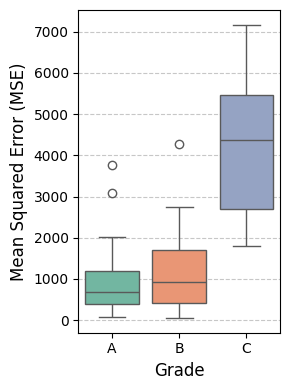

In [9]:
plt.figure(figsize=(3, 4))  # コンパクトなサイズ
sns.boxplot(data=evaluation_df, x='Folder', y='MSE', palette="Set2")
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
# plt.title("MSE Distribution by Folder", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
#時間計測

#allcracify_test
import os 
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import time

start = time.perf_counter()
data = "0203_energee_after"

inputfolder_lists = [
    f"/home/data/{data}/maskBB/A",
    f"/home/data/{data}/maskBB/B",
    f"/home/data/{data}/maskBB/C",
]
one_dimensional_data_dict = {}
evaluation_results = {}

for folder in inputfolder_lists:
    folder_name = os.path.basename(folder)
    image_paths = glob.glob(os.path.join(folder, '*.JPEG'))
    
    # 画像ファイル数をカウント
    num_images = len(image_paths)
    print(f"Folder {folder_name} contains {num_images} images.")

    for img_path in image_paths:
        # 画像の読み込み
        mask = cv2.imread(img_path)

        # グレースケール画像に変換
        gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

        # 二値化
        _, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # 輪郭を検出し、最大の輪郭を取得
        contours, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if not contours:
            continue
        max_contour = max(contours, key=cv2.contourArea)

        # 最小外接円を取得
        (x, y), radius = cv2.minEnclosingCircle(max_contour)
        radius = int(radius)

        # 重心を計算
        M = cv2.moments(max_contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0
        center = (cX, cY)

        # 極座標変換
        h, w = gray.shape
        flags = cv2.INTER_CUBIC + cv2.WARP_FILL_OUTLIERS + cv2.WARP_POLAR_LINEAR
        linear_polar = cv2.warpPolar(gray, (w, h), center, radius, flags)

        # 行ごとの黒ピクセル数をカウント
        black_pixel_count = np.sum(linear_polar == 0, axis=1)
        file_name = os.path.basename(img_path)
        one_dimensional_data_dict[file_name] = black_pixel_count

        # 真円の場合の理想データ（黒ピクセル数が0）
        y_pseudo = np.zeros_like(black_pixel_count)

        # 評価指標の計算
        mse = mean_squared_error(y_pseudo, black_pixel_count)
        
end = time.perf_counter()
print(f"Runtime: {end - start:.6f} seconds")
    




Folder A contains 48 images.
Folder B contains 30 images.


Folder C contains 38 images.
Runtime: 0.319054 seconds
